投擲 1000000 次後的估計機率: 0.166770
與理論值的誤差: 0.000103


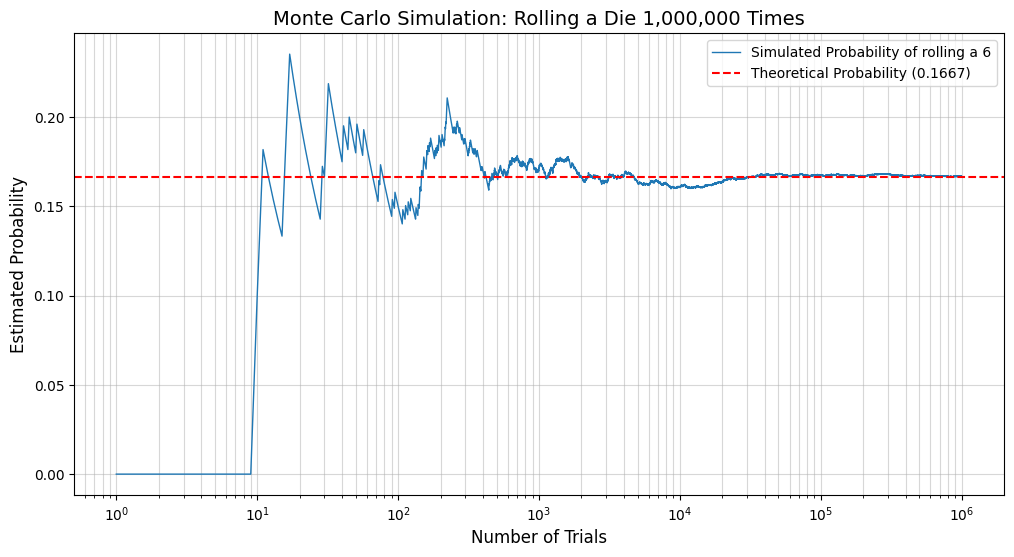

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 設定參數
n_trials = 1000000  # 投擲 1,000,000 次
target_value = 6    # 我們觀察點數 6 出現的機率

# 1. 模擬投擲骰子 (產生 1 到 6 的隨機整數)
rolls = np.random.randint(1, 7, size=n_trials)

# 2. 計算是否為目標點數 (布林陣列：True 為 1, False 為 0)
is_target = (rolls == target_value)

# 3. 計算累計出現次數與累計機率
# cumsum 會計算前 n 項的和，再除以目前的次數
cumulative_sum = np.cumsum(is_target)
trials_index = np.arange(1, n_trials + 1)
probabilities = cumulative_sum / trials_index

# 4. 繪圖
plt.figure(figsize=(12, 6))
plt.plot(trials_index, probabilities, label=f'Simulated Probability of rolling a {target_value}', color='#1f77b4', linewidth=1)

# 畫出理論機率線 (1/6)
theoretical_prob = 1/6
plt.axhline(y=theoretical_prob, color='r', linestyle='--', label=f'Theoretical Probability ({theoretical_prob:.4f})')

# 設定圖表資訊
plt.title(f'Monte Carlo Simulation: Rolling a Die {n_trials:,} Times', fontsize=14)
plt.xlabel('Number of Trials', fontsize=12)
plt.ylabel('Estimated Probability', fontsize=12)
plt.xscale('log')  # 使用對數對角，能更清楚看到前期的劇烈波動
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.5)

# 顯示最後估算的結果
print(f"投擲 {n_trials} 次後的估計機率: {probabilities[-1]:.6f}")
print(f"與理論值的誤差: {abs(probabilities[-1] - theoretical_prob):.6f}")

plt.show()

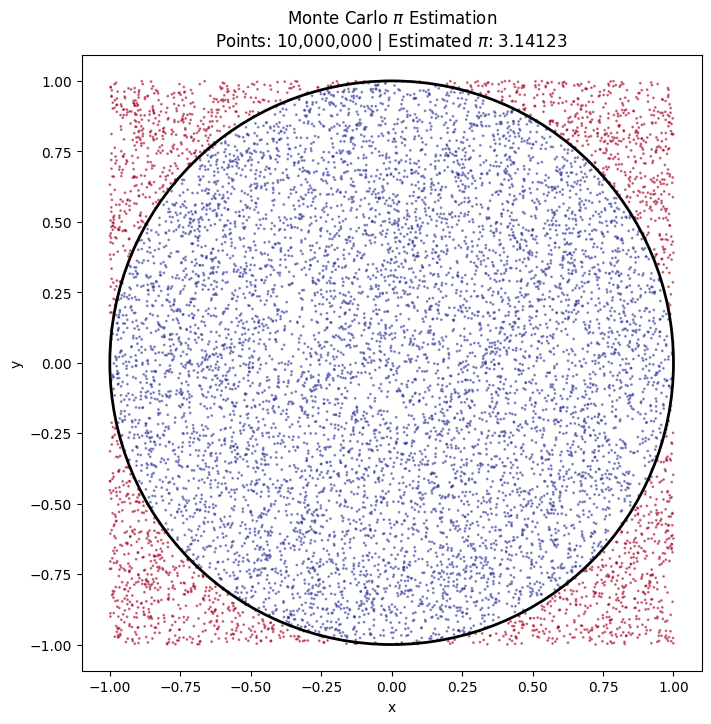

模擬 1,000,000 次後的 PI 估計值: 3.1412268
與真實 PI 的誤差: 0.000366


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 設定投擲次數
n_points = 10000000

# 1. 隨機產生 x, y 座標 (範圍在 -1 到 1 之間)
x = np.random.uniform(-1, 1, n_points)
y = np.random.uniform(-1, 1, n_points)

# 2. 計算點到原點的距離平方 (x^2 + y^2)
# 如果距離平方 <= 1，代表點在圓內
inside_circle = (x**2 + y**2) <= 1

# 3. 估算 PI
pi_estimate = 4 * np.sum(inside_circle) / n_points

# 4. 繪圖 (為了效能，我們只畫前 10,000 個點，否則圖表會跑不動)
plt.figure(figsize=(8, 8))
plt.scatter(x[:10000], y[:10000], c=inside_circle[:10000], 
            cmap='RdYlBu', s=1, alpha=0.5)

# 畫出圓形的輪廓
circle = plt.Circle((0, 0), 1, color='black', fill=False, linewidth=2)
plt.gca().add_patch(circle)

plt.title(f"Monte Carlo $\pi$ Estimation\nPoints: {n_points:,} | Estimated $\pi$: {pi_estimate:.5f}")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.show()

print(f"模擬 1,000,000 次後的 PI 估計值: {pi_estimate}")
print(f"與真實 PI 的誤差: {abs(pi_estimate - np.pi):.6f}")